In [1]:
%matplotlib inline

In [2]:
import gym
!pip install seaborn
!pip install tqdm
!pip install gym
from __future__ import annotations


from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


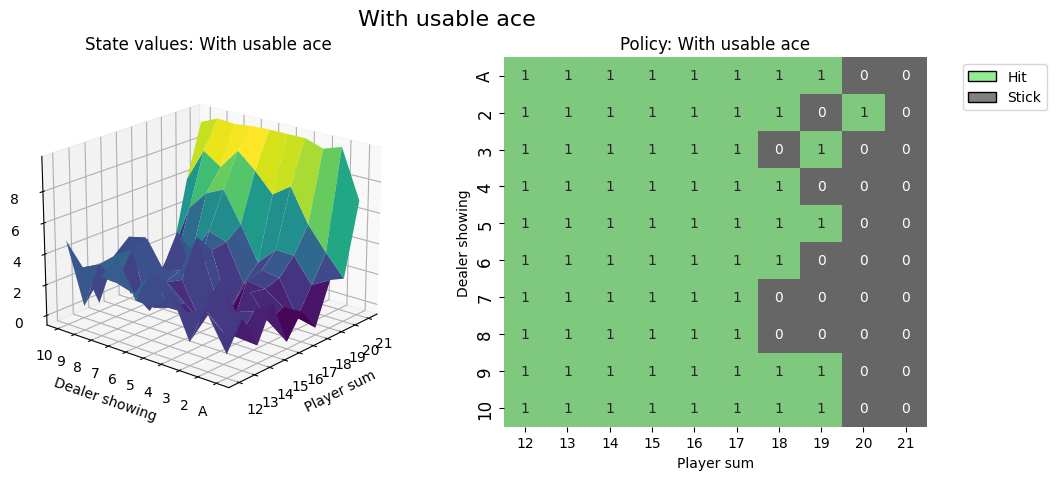

Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 0.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Reward: -1.0
Episode finished. Reward: 1.0
Episode finished. Rew

In [3]:
import gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def create_grids(agent, usable_ace=False):
    """Create value and policy grid given an agent."""
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        np.arange(12, 22),
        np.arange(1, 11),
    )

    value = np.apply_along_axis(
        lambda obs: state_value[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    value_grid = player_count, dealer_count, value

    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return value_grid, policy_grid


def create_plots(value_grid, policy_grid, title: str):
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig


# Create the Blackjack environment
env = gym.make('Blackjack-v1')

class BlackjackAgent:
    def __init__(self, alpha, gamma, epsilon):
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))
    
    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(self.q_values[state])
    
    def update(self, state, action, reward, next_state, done):
        old_q_value = self.q_values[state][action]
        next_max_q_value = np.max(self.q_values[next_state])
        new_q_value = old_q_value + self.alpha * (reward + self.gamma * next_max_q_value - old_q_value)
        self.q_values[state][action] = new_q_value
    
    def decay_epsilon(self):
        self.epsilon *= 0.99

# Hyperparameters
alpha = 0.5
gamma = 0.9
epsilon = 1.0

# Create the agent
agent = BlackjackAgent(alpha, gamma, epsilon)

# Train the agent
num_episodes = 100000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.update(state, action, reward, next_state, done)
        state = next_state
    
    agent.decay_epsilon()

# State values and policy with usable ace
value_grid, policy_grid = create_grids(agent, usable_ace=True)
fig = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

# Play Blackjack using the learned policy
num_episodes = 50
for episode in range(num_episodes):
    state = env.reset()
    done = False
    
    while not done:
        action = agent.get_action(state)
        state, reward, done, _ = env.step(action)
    
    print("Episode finished. Reward:", reward)
